In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
# THIS BIT OF CODE IS ESSENTIAL TO READ THE DATASET
data = pd.read_csv(r"D:\Retail-Store-Inventory-Forecasting-Data-Analysis\Retail_Store_Data\retail_store_inventory.csv")

In [37]:
# THIS BIT OF CODE IS ESSENTIAL TO CREATE A COPY OF THE ACTUAL CODE BECAUSE ANY CHANGES IN THIS DATAFRAME WILL NOT AFFECT THE ACTUAL DATASET
df = data.copy()

In [38]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE SHAPE OF OUR DATAFRAME(ACTUAL DATASET BEFORE CONVERSION)
print("No of Rows in this dataset - ", len(df))
print("-" * 50)
print("No of Columns in this dataset - ", df.shape[1])
print("-" * 50)
print("Size of this dataset - ", df.shape)

No of Rows in this dataset -  73100
--------------------------------------------------
No of Columns in this dataset -  15
--------------------------------------------------
Size of this dataset -  (73100, 15)


In [39]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE COUNT OF NULL VALUES FROM EVERY ATTRIBUTE
print(df.isna().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [40]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE COUNT OF UNIQUE VALUES FROM EVERY ATTRIBUTE
print(df.nunique())

Date                    731
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level         451
Units Sold              498
Units Ordered           181
Demand Forecast       31608
Price                  8999
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9751
Seasonality               4
dtype: int64


In [41]:
# THIS BIT OF CODE IS ESSENTIAL TO KNOW THE RANGE OF YEARS WE ARE DEALING WITH
a = df['Date']
print(a.head(10))
print("-" * 30)
print(a.tail(10))

0    1/1/2022
1    1/1/2022
2    1/1/2022
3    1/1/2022
4    1/1/2022
5    1/1/2022
6    1/1/2022
7    1/1/2022
8    1/1/2022
9    1/1/2022
Name: Date, dtype: object
------------------------------
73090    1/1/2024
73091    1/1/2024
73092    1/1/2024
73093    1/1/2024
73094    1/1/2024
73095    1/1/2024
73096    1/1/2024
73097    1/1/2024
73098    1/1/2024
73099    1/1/2024
Name: Date, dtype: object


In [42]:
# CREATING A NEW COLUMN - 'sales'
df['sales'] = df['Units Sold'] * df['Price']

In [43]:
print(df['sales'])

0         4254.50
1         9451.50
2         1819.35
3         1995.92
4         1030.96
           ...   
73095      589.84
73096     4211.07
73097      399.96
73098    14028.96
73099      470.34
Name: sales, Length: 73100, dtype: float64


In [44]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])  # Replace 'date' with the actual column name
# Extract month
df['month'] = df['Date'].dt.month
# Extract year for YoY grouping
df['year'] = df['Date'].dt.year

In [45]:
# Rebuild your group and keep raw sales
yearly_sales = df.groupby('year', as_index=False)['sales'].sum()

# Compute YoY growth
yearly_sales['yoy_growth_%'] = yearly_sales['sales'].pct_change() * 100

# Format nicely (for display only)
yearly_sales['sales_formatted'] = yearly_sales['sales'].apply(lambda x: f"{x:,.2f}")
yearly_sales['yoy_growth_formatted'] = yearly_sales['yoy_growth_%'].apply(lambda x: f"{x:,.2f}%" if pd.notnull(x) else "-")
# Filter out 2024 to focus on complete years
filtered_sales = yearly_sales[yearly_sales['year'] < 2024]
yearly_sales

,year,sales,yoy_growth_%,sales_formatted,yoy_growth_formatted
0,2022,2.760373e+08,NaN,"276,037,316.73",-
1,2023,2.735034e+08,-0.917946,"273,503,443.82",-0.92%
2,2024,6.881244e+05,-99.748404,"688,124.36",-99.75%


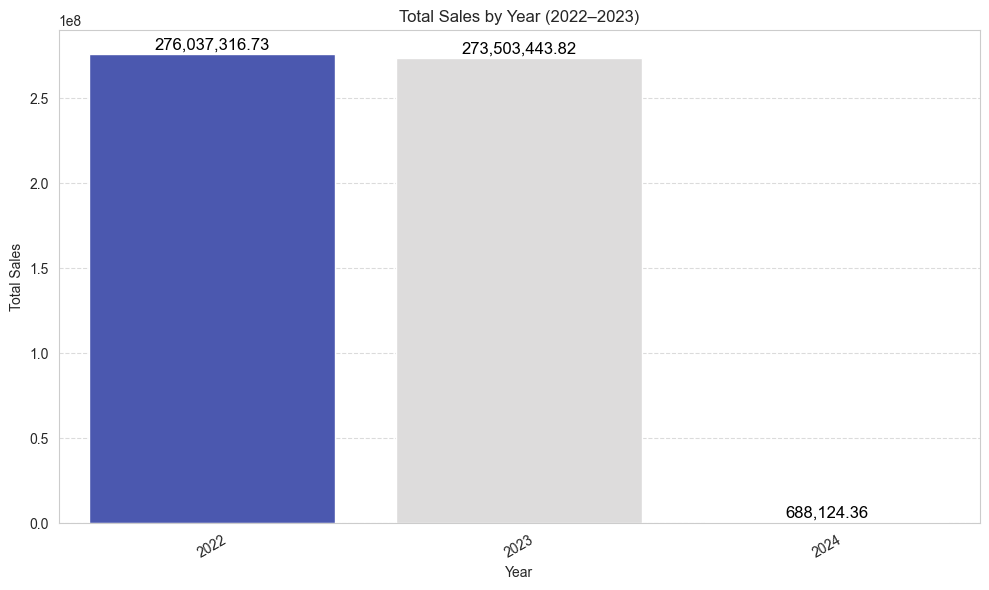

In [46]:
# let's visualize year-over-year sales and growth percentage
plt.figure(figsize=(10,6))
ax = sns.barplot(data=yearly_sales, x='year', y='sales',hue='year', palette='coolwarm',legend=False)

# Set plot titles and labels using the Axes object
ax.set_title('Total Sales by Year (2022–2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.tick_params(axis='x', rotation=30)

# Annotate each bar
for conatiner in ax.containers:
    for bar in conatiner:
        height = bar.get_height()
        if not pd.isna(height):
            ax.annotate(
                f'{height:,.2f}',  # format with commas and 2 decimal places
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=12,
                color='black'
            )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

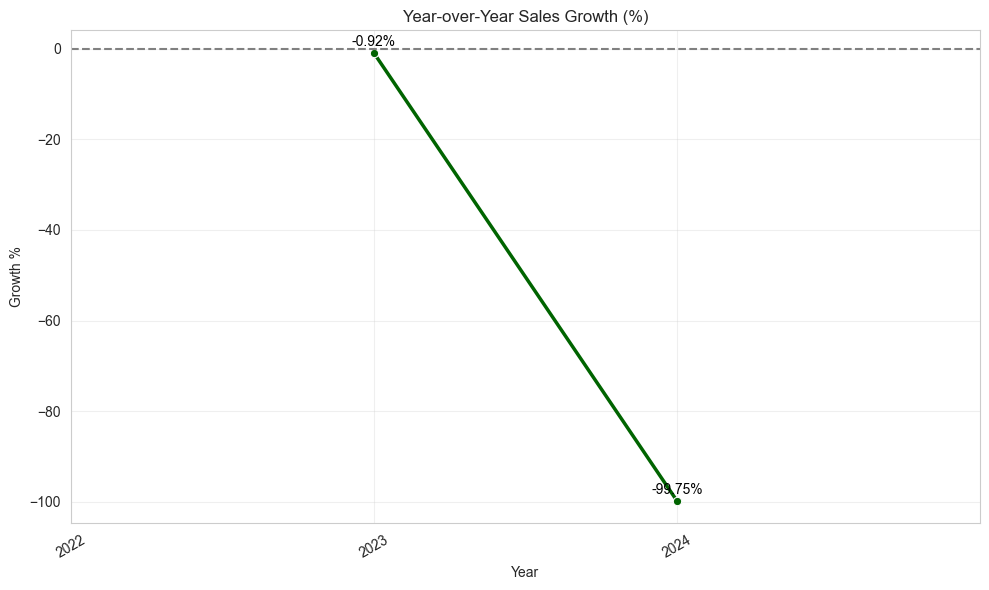

In [47]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=yearly_sales, x='year', y='yoy_growth_%', marker='o', linewidth=2.5, color='darkgreen')

# Titles and labels
ax.set_title('Year-over-Year Sales Growth (%)')
ax.set_xlabel('Year')
ax.set_xlim(2022, 2025)
ax.set_xticks(range(2022, 2025))
ax.set_ylabel('Growth %')
ax.tick_params(axis='x', rotation=30)

# Annotate each data point directly
for i, row in yearly_sales.iterrows():
    if pd.notnull(row['yoy_growth_%']):
        ax.annotate(
            f"{row['yoy_growth_%']:,.2f}%",
            xy=(row['year'], row['yoy_growth_%']),
            xytext=(0, 5),
            textcoords="offset points",
            ha='center',
            fontsize=10,
            color='black'
        )


# Visual details
plt.axhline(0, color='gray', linestyle='--')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
# BR2 starts now

max_sales_value = df['sales'].max()
best_selling_category = df[df['sales'] == max_sales_value]
best_selling_category

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,sales,month,year
59241,2023-08-16,S003,P0002,Furniture,East,497,483,108,502.77,99.09,5,Cloudy,0,102.7,Spring,47860.47,8,2023


In [49]:
print(best_selling_category[['year','Category', 'sales']])

       year   Category     sales
59241  2023  Furniture  47860.47


In [50]:
least_sales_value = df['sales'].min()
worst_selling_category = df[df['sales'] == least_sales_value]
worst_selling_category

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,sales,month,year
63,2022-01-01,S004,P0004,Groceries,West,437,0,160,-2.40,87.23,10,Sunny,0,90.36,Spring,0.0,1,2022
159,2022-01-02,S003,P0020,Electronics,East,155,0,92,9.42,57.07,10,Rainy,1,53.34,Summer,0.0,1,2022
303,2022-01-04,S001,P0004,Electronics,North,209,0,123,15.37,44.81,5,Sunny,1,45.53,Winter,0.0,1,2022
1107,2022-01-12,S001,P0008,Clothing,West,432,0,33,-3.55,55.07,0,Cloudy,0,51.15,Autumn,0.0,1,2022
1398,2022-01-14,S005,P0019,Groceries,West,65,0,122,-0.03,82.34,20,Rainy,1,79.80,Winter,0.0,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71239,2023-12-14,S002,P0020,Clothing,West,135,0,148,0.35,90.15,15,Cloudy,0,85.24,Winter,0.0,12,2023
72053,2023-12-22,S003,P0014,Toys,South,421,0,133,-4.03,11.71,15,Cloudy,0,12.11,Summer,0.0,12,2023
72078,2023-12-22,S004,P0019,Electronics,East,301,0,24,-9.08,59.17,5,Cloudy,1,58.16,Autumn,0.0,12,2023
72463,2023-12-26,S004,P0004,Electronics,North,101,0,70,16.66,72.31,20,Snowy,1,76.93,Summer,0.0,12,2023


In [51]:
print(worst_selling_category[['year','Category', 'sales']])

       year     Category  sales
63     2022    Groceries    0.0
159    2022  Electronics    0.0
303    2022  Electronics    0.0
1107   2022     Clothing    0.0
1398   2022    Groceries    0.0
...     ...          ...    ...
71239  2023     Clothing    0.0
72053  2023         Toys    0.0
72078  2023  Electronics    0.0
72463  2023  Electronics    0.0
72917  2023     Clothing    0.0

[360 rows x 3 columns]


In [52]:
if least_sales_value == 0.0 and len(df[df['sales'] > 0]) > 0: # Check if there are any non-zero sales
    lowest_non_zero_sales_value = df[df['sales'] > 0]['sales'].min()
    lowest_selling_products_non_zero = df[df['sales'] == lowest_non_zero_sales_value]
    print(f"\n--- Lowest-Selling Category(s) (Non-Zero Sales: {lowest_non_zero_sales_value}) ---")
    print(lowest_selling_products_non_zero[['year','Category', 'sales']])
else:
    print("\nNote: Minimum sales value is not 0, or all sales are 0.")



--- Lowest-Selling Category(s) (Non-Zero Sales: 10.11) ---
       year   Category  sales
46046  2023  Furniture  10.11


In [53]:
# Define the columns you want to group by for your analysis
grouping_dimensions = [
    'year',
    'Category',
]

# Create an empty list to store results if you want to gather them in a DataFrame later
results = []

print("--- Best and Worst Selling Products Breakdown ---")

# Iterate through each unique combination of your grouping dimensions
for name, group in df.groupby(grouping_dimensions):

    # Unpack the current group's identifying values
    current_year, current_category = name

    # Skip if the group is empty (shouldn't happen with valid groupby but good practice)
    if group.empty:
        continue

    # Find max and min sales within the current group
    max_sales_in_group = group['sales'].max()
    min_sales_in_group = group['sales'].min()

    # Identify product(s) with max sales in this group
    best_category_in_group = group[group['sales'] == max_sales_in_group]
    # Use drop_duplicates in case multiple products have the exact same max sales value
    best_category_info = best_category_in_group[['Category', 'sales']].drop_duplicates()

    # Identify product(s) with min sales in this group
    worst_category_in_group = group[group['sales'] == min_sales_in_group]
    worst_category_info = worst_category_in_group[['Category', 'sales']].drop_duplicates()

    # If you want to exclude 0 sales as "worst-selling" and find the lowest non-zero sale
    lowest_non_zero_sales_in_group = None
    lowest_selling_category_non_zero_info = None

    if min_sales_in_group == 0.0 and len(group[group['sales'] > 0]) > 0:
        lowest_non_zero_sales_in_group = group[group['sales'] > 0]['sales'].min()
        lowest_selling_category_non_zero = group[group['sales'] == lowest_non_zero_sales_in_group]
        lowest_selling_category_non_zero_info = lowest_selling_category_non_zero[['Category', 'sales']].drop_duplicates()


    # Print results for the current group
    print(f"\n----- Breakdown for -----")
    print(f"Year: {current_year}, Category: {current_category}")
    print("-------------------------")

    print(f"Best-Selling Category(s) (Sales: {max_sales_in_group:.2f}):")
    print(best_category_info.to_string(index=False)) # .to_string(index=False) for cleaner output

    print(f"\nWorst-Selling Category(s) (Sales: {min_sales_in_group:.2f}):")
    print(worst_category_info.to_string(index=False))

    if lowest_non_zero_sales_in_group is not None:
        print(f"\nLowest Non-Zero Selling Category(s) (Sales: {lowest_non_zero_sales_in_group:.2f}):")
        print(lowest_selling_category_non_zero_info.to_string(index=False))

    print("\n" + "="*50) # Separator for clarity

    # Optional: Append results to the list for later DataFrame creation
    results.append({
        'Year': current_year,
        'Category': current_category,
        'Max_Sales': max_sales_in_group,
        'Best_Categories': best_category_info['Category'].tolist(), # Store as list
        'Min_Sales': min_sales_in_group,
        'Worst_Categories': worst_category_info['Category'].tolist(),
        'Lowest_Non_Zero_Sales': lowest_non_zero_sales_in_group,
        'Lowest_Non_Zero_Categories': lowest_selling_category_non_zero_info['Category'].tolist() if lowest_selling_category_non_zero_info is not None else []
    })

# Convert results to a DataFrame if you want to analyze them further
# final_results_df = pd.DataFrame(results)
# print("\n--- Summary DataFrame of Results ---")
# print(final_results_df.head()) # print first few rows of the summary

--- Best and Worst Selling Products Breakdown ---

----- Breakdown for -----
Year: 2022, Category: Clothing
-------------------------
Best-Selling Category(s) (Sales: 45575.88):
Category    sales
Clothing 45575.88

Worst-Selling Category(s) (Sales: 0.00):
Category  sales
Clothing    0.0

Lowest Non-Zero Selling Category(s) (Sales: 12.23):
Category  sales
Clothing  12.23


----- Breakdown for -----
Year: 2022, Category: Electronics
-------------------------
Best-Selling Category(s) (Sales: 44500.50):
   Category   sales
Electronics 44500.5

Worst-Selling Category(s) (Sales: 0.00):
   Category  sales
Electronics    0.0

Lowest Non-Zero Selling Category(s) (Sales: 13.79):
   Category  sales
Electronics  13.79


----- Breakdown for -----
Year: 2022, Category: Furniture
-------------------------
Best-Selling Category(s) (Sales: 45584.12):
 Category    sales
Furniture 45584.12

Worst-Selling Category(s) (Sales: 0.00):
 Category  sales
Furniture    0.0

Lowest Non-Zero Selling Category(s) (Sa

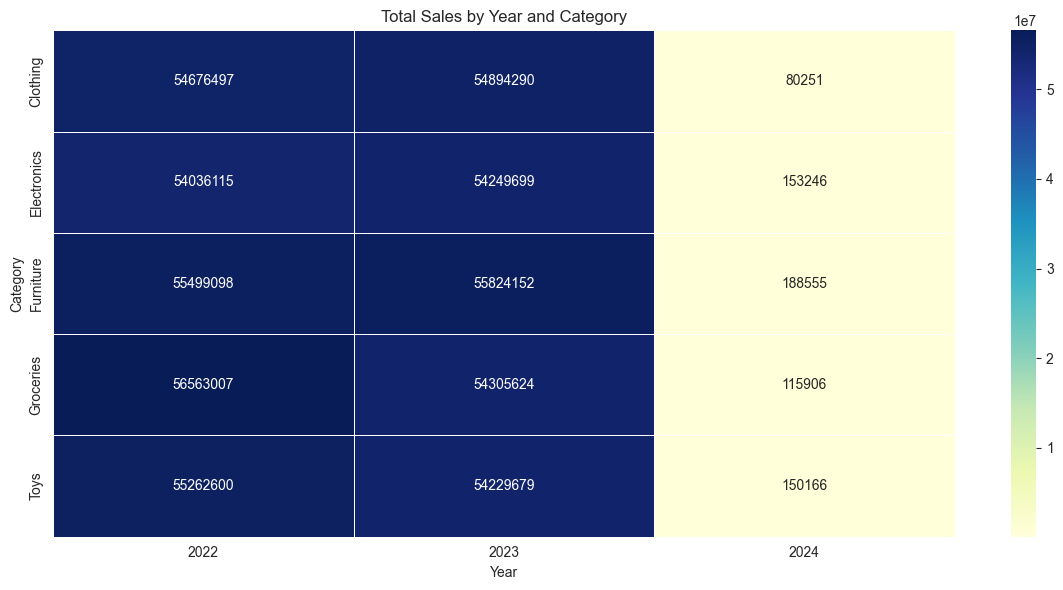

In [54]:
# BR2 Visualization
heatmap_df = df.groupby(['Category', 'year'])['sales'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_df, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Total Sales by Year and Category')
plt.xlabel('Year')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


In [55]:
# GAR 2 starts here
category_performance = (
    df.groupby(['year', 'Category'])['Units Sold']
    .sum()
    .reset_index()
    .sort_values(['year', 'Units Sold'], ascending=[True, False])
)
category_performance.columns = ['Year', 'Category', 'Total_Quantity_Sold']




C:\Users\Mohan Abhijeeth\AppData\Local\Temp\ipykernel_26348\1332807335.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Total_Quantity_Sold'))
D:\EPAM_Data_Analyst_Training\JupyterProject\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\EPAM_Data_Analyst_Training\JupyterProject\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variabl

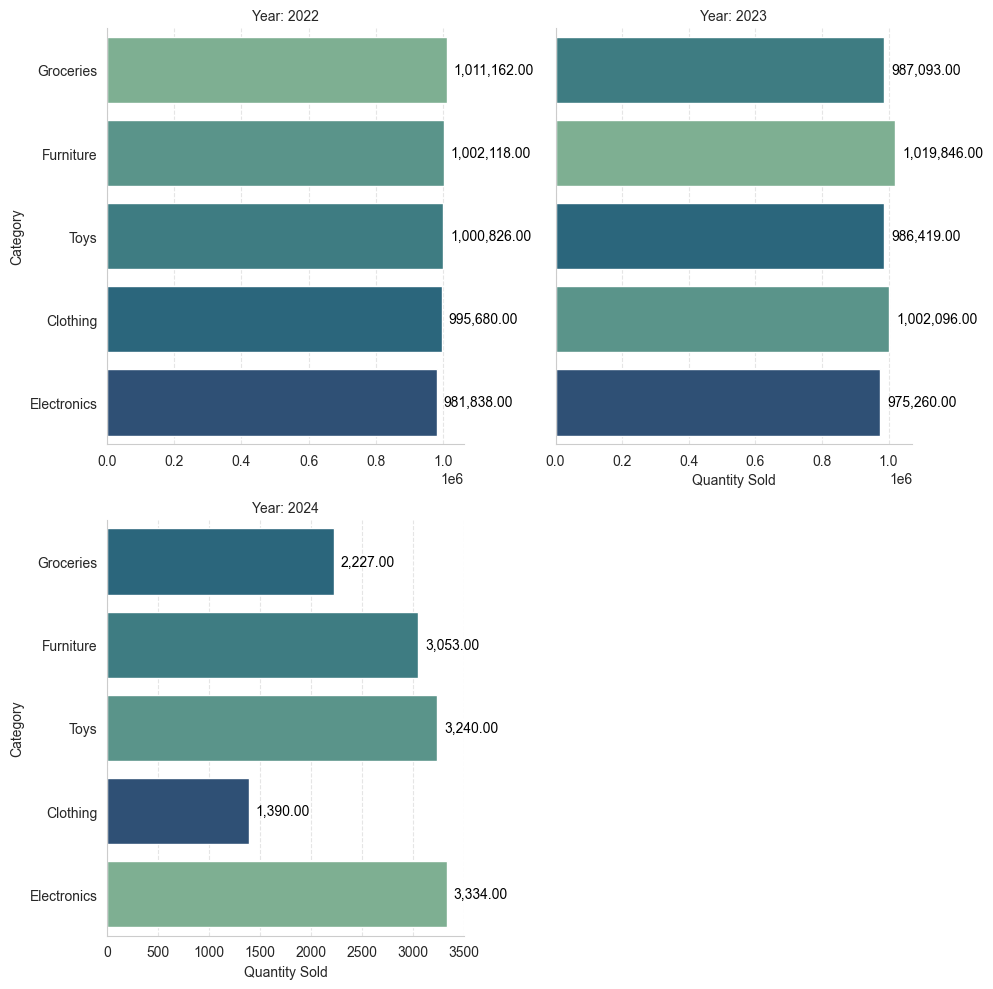

In [60]:
# # GAR 2 visualization
top_performers = (
    category_performance
    .groupby('Year')
    .apply(lambda x: x.nlargest(5, 'Total_Quantity_Sold'))
    .reset_index(drop=True)
)

# Set up the grid
g = sns.FacetGrid(top_performers, col='Year', col_wrap=2, height=5, sharex=False)

# Draw barplots on each facet
g.map_dataframe(
    sns.barplot,
    x='Total_Quantity_Sold',
    y='Category',
    palette='crest'
)

# Add titles and layout tweaks
g.set_titles(col_template='Year: {col_name}')
g.set_axis_labels('Quantity Sold', 'Category')
g.set(xlim=(0, None))
# Annotate each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        width = bar.get_width()
        if not pd.isna(width):
            ax.annotate(
                f'{width:,.2f}',
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0),
                textcoords="offset points",
                va='center',
                fontsize=10,
                color='black'
            )
for ax in g.axes.flat:
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()